<a href="https://colab.research.google.com/github/chiyanglin-AStar/science_coding/blob/main/electrodynamics_numerical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical Methods of Electrodynamics

Simulating electrodynamics requires numerical methods to solve Maxwell's equations, which govern how electric and magnetic fields evolve in space and time. Here are some common numerical methods used in electrodynamics, along with explanations of each approach:

### 1. **Finite Difference Time Domain (FDTD) Method**

   - **Description**: FDTD is one of the most popular methods for solving time-dependent Maxwell's equations. It discretizes both space and time, approximating derivatives with finite differences. The time and spatial updates use Yee’s algorithm, where electric and magnetic fields are updated in a staggered manner.
   - **Advantages**: Directly solves Maxwell’s equations in the time domain, providing a full-time history of the fields. It is intuitive and straightforward to implement in a Cartesian grid.
   - **Disadvantages**: Can require substantial computational resources, especially in 3D simulations, and is limited to regular grid structures.
   - **Applications**: Often used in antenna design, microwave circuits, photonic crystals, and radar systems.

   **Example Update Equations:**

   For the electric and magnetic fields:
   
   $E_x^{n+1}(i,j,k) = E_x^n(i,j,k) + \frac{\Delta t}{\epsilon} \left( \frac{H_z^n(i,j+1,k) - H_z^n(i,j,k)}{\Delta y} - \frac{H_y^n(i,j,k+1) - H_y^n(i,j,k)}{\Delta z} \right)$

   $H_x^{n+1/2}(i,j,k) = H_x^{n-1/2}(i,j,k) - \frac{\Delta t}{\mu} \left( \frac{E_y^n(i,j,k+1) - E_y^n(i,j,k)}{\Delta z} - \frac{E_z^n(i,j+1,k) - E_z^n(i,j,k)}{\Delta y} \right)$





### 2. **Finite Element Method (FEM)**

   - **Description**: FEM discretizes the domain into small elements and approximates the fields within each element using basis functions. It is used to solve the frequency-domain form of Maxwell’s equations, which makes it suitable for harmonic analysis.
   - **Advantages**: Handles complex geometries and boundary conditions very well and allows for flexible meshing.
   - **Disadvantages**: More complex to implement than FDTD, and solving large systems of equations in 3D can be computationally demanding.
   - **Applications**: Commonly used in waveguides, cavities, and scattering problems, as well as for analyzing complex material boundaries.

   **Example Equation for Discretization:**

   FEM discretizes the weak form of Maxwell’s curl equations:
   
   $\int_\Omega \nabla \times \mathbf{H} \cdot \nabla \times \mathbf{v} \, d\Omega = \int_\Omega j \cdot \mathbf{v} \, d\Omega$

   where $\mathbf{v}$ is a test function and $\Omega$ is the domain.


### 3. **Finite Difference Frequency Domain (FDFD) Method**

   - **Description**: FDFD uses finite differences to solve the frequency-domain Maxwell's equations. It calculates the fields for a single frequency rather than evolving them in time, making it a good choice for steady-state or harmonic analysis.
   - **Advantages**: Efficient for monochromatic or steady-state problems, and the computational cost scales well for certain large systems.
   - **Disadvantages**: Limited to frequency-domain problems, and can become computationally challenging for very high frequencies or broadband solutions.
   - **Applications**: Useful in photonics, waveguide analysis, and resonant frequency analysis.

   **Example Update Equation:**

   For an electric field in the frequency domain:
   
   $\nabla \times \nabla \times \mathbf{E} - k^2 \mathbf{E} = i \omega \mu \mathbf{J}$
   where $k$ is the wavenumber, $\mathbf{J}$ is the current source, and $\mathbf{E}$ is the electric field.

### 4. **Method of Moments (MoM)**

   - **Description**: MoM converts continuous field equations into matrix equations by expanding the unknowns in terms of basis functions and testing them against similar functions. This reduces Maxwell’s equations into an algebraic form, particularly for boundary value problems.
   - **Advantages**: Excellent for open-boundary problems and surface-based problems like scattering and antenna design.
   - **Disadvantages**: The resulting matrix is dense, leading to high memory requirements for large systems. Solving these dense systems can be computationally intensive.
   - **Applications**: Predominantly used in antenna and scattering analysis, especially for surfaces or boundary-based problems.

   **Example Setup:**

   For an antenna current distribution:
   
   $Z \cdot I = V$

   where $Z$ is the impedance matrix, $I$ is the current vector, and $V$ is the excitation voltage.



### 5. **Pseudospectral Time Domain (PSTD)**

   - **Description**: PSTD employs Fourier transforms to approximate spatial derivatives, achieving higher accuracy than FDTD with fewer grid points.
   - **Advantages**: High spatial accuracy for periodic or smooth fields, and reduces computational load in many cases.
   - **Disadvantages**: Poor at handling complex boundaries or highly inhomogeneous media, and requires periodic boundary conditions.
   - **Applications**: Used in wave propagation simulations in acoustics, seismic analysis, and smooth periodic systems.

   **Example Setup:**

   Spatial derivatives of the electric and magnetic fields are computed using Fourier transforms:
   
   $\frac{\partial E}{\partial x} \approx \text{IFFT}(k_x \times \text{FFT}(E))$
   where $k_x$ is the wavenumber in the x-direction.



### 6. **Particle-in-Cell (PIC) Method**

   - **Description**: PIC is a hybrid method that combines particle simulation (tracking charged particles) with grid-based field solvers (often FDTD) to self-consistently solve Maxwell's equations and particle motion.
   - **Advantages**: Effective for plasma simulations where both fields and particle motion must be considered, like plasma physics, high-energy physics, and astrophysics.
   - **Disadvantages**: Requires significant computational resources due to particle tracking and field calculations; may require high-performance computing for large simulations.
   - **Applications**: Common in plasma physics, astrophysical simulations, and particle accelerators.

   **Example Steps**:
   - Solve Maxwell’s equations on the grid (often with FDTD).
   - Interpolate fields to particle positions to update velocities.
   - Move particles according to velocities.
   - Deposit particle currents and charge densities back on the grid.



### References and Further Reading

- **Books**:
   - *Computational Electrodynamics: The Finite-Difference Time-Domain Method* by Allen Taflove and Susan C. Hagness
   - *Field Computation by Moment Methods* by Roger F. Harrington
   - *The Finite Element Method in Electromagnetics* by Jianming Jin
   - *Electromagnetic Simulation Using the FDTD Method with Python and MATLAB* by Dennis M. Sullivan

These methods provide various ways to handle time-dependent and frequency-dependent problems, accommodating different geometries, boundary conditions, and computational efficiency requirements.


Certainly! Here are basic implementations of some of these electrodynamics methods in Python. Each example simplifies the principles for educational purposes.

Certainly! Here are basic implementations of some of these electrodynamics methods in Python. Each example simplifies the principles for educational purposes.

---

### 1. **Finite Difference Time Domain (FDTD) Method**

This example demonstrates a simple 1D FDTD setup to simulate wave propagation along a line.


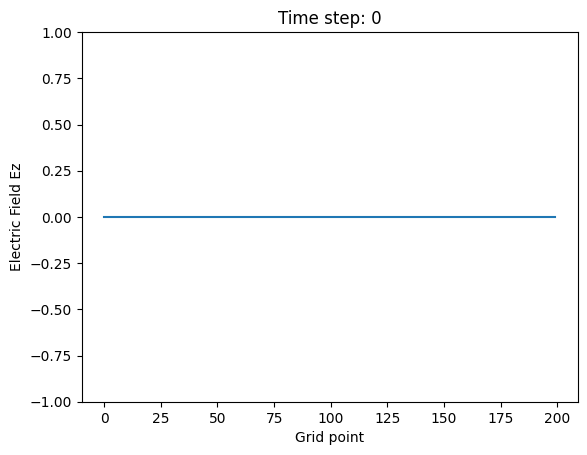

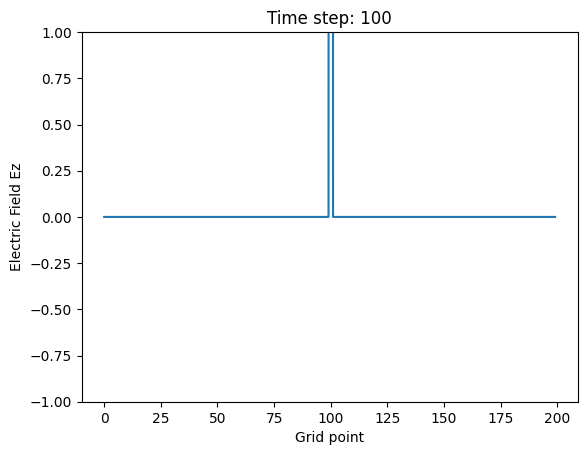

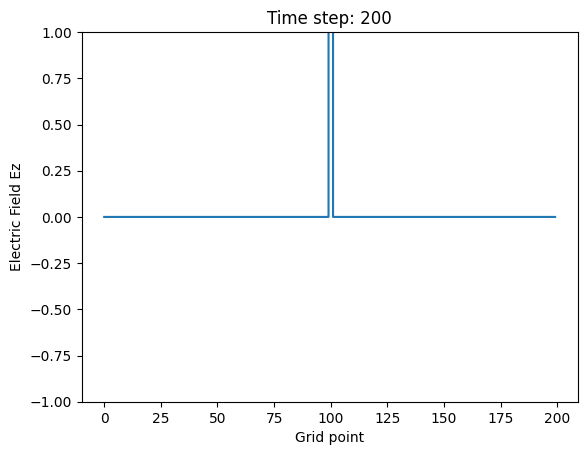

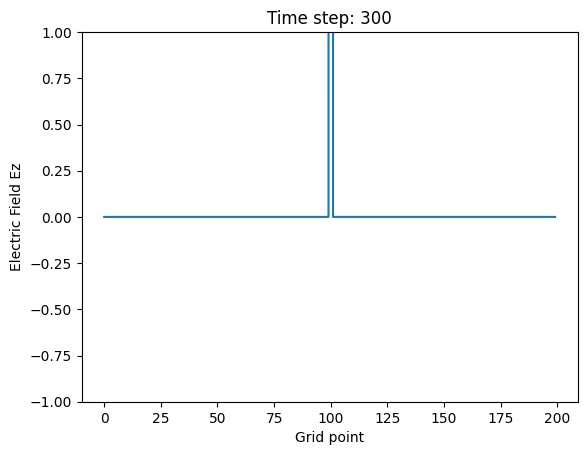

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 3e8                # Speed of light in vacuum
dx = 1e-3              # Space step
dt = dx / (2 * c)      # Time step (stability condition)
L = 200                # Length of the simulation domain
time_steps = 400       # Number of time steps

Ez = np.zeros(L)       # Electric field
Hy = np.zeros(L)       # Magnetic field

# Main FDTD loop
for t in range(time_steps):
    # Update magnetic field
    for i in range(L - 1):
        Hy[i] += (Ez[i + 1] - Ez[i]) * dt / dx

    # Update electric field
    for i in range(1, L):
        Ez[i] += (Hy[i] - Hy[i - 1]) * dt / dx

    # Source (simple sinusoidal source at the center)
    Ez[L // 2] += np.sin(2 * np.pi * 1e9 * t * dt)

    # Plot every 10 time steps
    if t % 100 == 0:
        plt.clf()
        plt.plot(Ez, label="Ez field")
        plt.ylim(-1, 1)
        plt.xlabel("Grid point")
        plt.ylabel("Electric Field Ez")
        plt.title(f"Time step: {t}")
        plt.pause(0.01)

plt.show()

### 2. **Finite Element Method (FEM)**

This example simulates the solution of a static field problem for a rectangular domain, where FEM is used to approximate Laplace's equation, assuming boundary conditions.

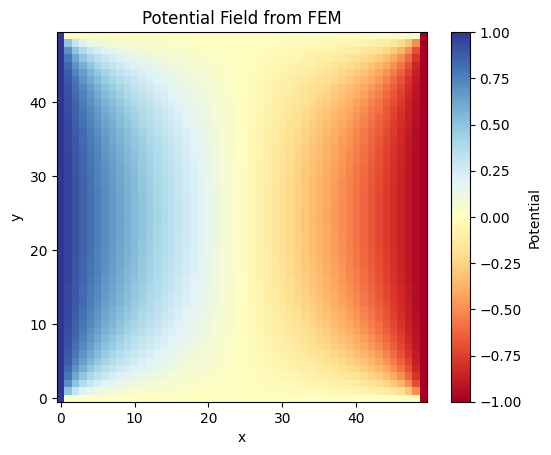

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Parameters
nx, ny = 50, 50
V = np.zeros((nx, ny))

# Boundary conditions (e.g., fixed potentials at edges)
V[:, 0] = 1   # Left boundary
V[:, -1] = -1 # Right boundary

# Build coefficient matrix for Laplace's equation using FEM
A = lil_matrix((nx*ny, nx*ny))
b = np.zeros(nx * ny)

# Fill matrix based on finite element discretization
for i in range(1, nx-1):
    for j in range(1, ny-1):
        idx = i * ny + j
        A[idx, idx] = -4
        A[idx, idx-1] = 1
        A[idx, idx+1] = 1
        A[idx, idx-ny] = 1
        A[idx, idx+ny] = 1

# Apply boundary conditions
for i in range(nx):
    for j in range(ny):
        if i == 0 or i == nx-1 or j == 0 or j == ny-1:
            idx = i * ny + j
            A[idx, idx] = 1
            b[idx] = V[i, j]

# Solve
V_flat = spsolve(A.tocsc(), b)
V = V_flat.reshape((nx, ny))

# Plot result
plt.imshow(V, cmap="RdYlBu", origin="lower")
plt.colorbar(label="Potential")
plt.title("Potential Field from FEM")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3. **Finite Difference Frequency Domain (FDFD)**

This example calculates a 1D wave equation in the frequency domain using finite differences.

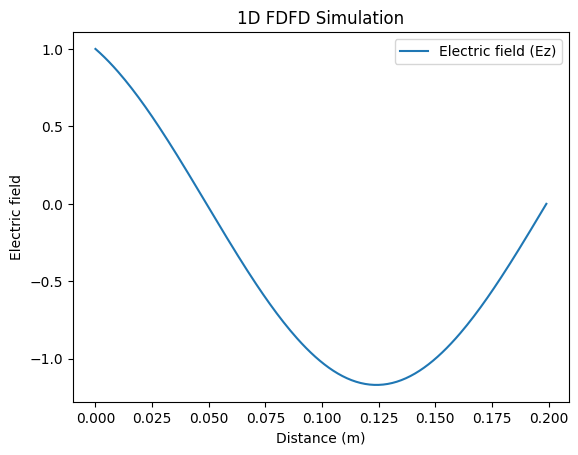

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Parameters
L = 200                  # Number of grid points
dx = 1e-3                # Space step
freq = 1e9               # Frequency (1 GHz)
c = 3e8                  # Speed of light
k = 2 * np.pi * freq / c # Wavenumber

# Coefficient matrix for finite difference
A = np.zeros((L, L))
b = np.zeros(L)

# Define finite-difference matrix
for i in range(1, L - 1):
    A[i, i-1] = 1
    A[i, i] = -2 + (dx ** 2 * k ** 2)
    A[i, i+1] = 1

# Boundary conditions
A[0, 0] = A[L-1, L-1] = 1
b[0] = 1  # Incident wave at the left boundary

# Solve for electric field distribution
E = solve(A, b)

# Plot result
plt.plot(np.arange(L) * dx, E, label="Electric field (Ez)")
plt.xlabel("Distance (m)")
plt.ylabel("Electric field")
plt.title("1D FDFD Simulation")
plt.legend()
plt.show()

### 4. **Method of Moments (MoM)**

The example below uses MoM to compute the current on a short linear dipole antenna in the frequency domain.

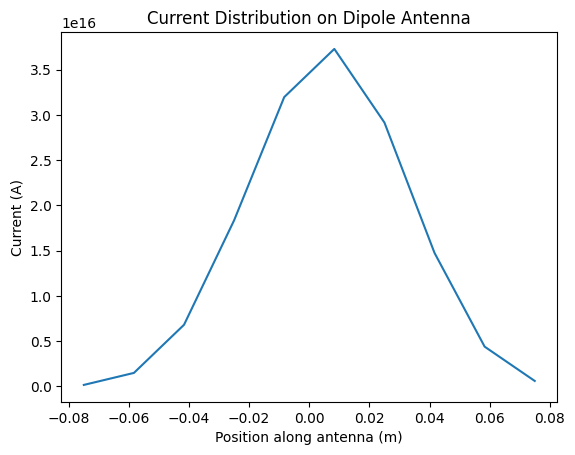

In [8]:
import numpy as np
from scipy.integrate import quad
from scipy.constants import c, epsilon_0

# Antenna parameters
freq = 1e9             # 1 GHz
wavelength = c / freq
length = wavelength / 2  # Half-wavelength dipole
num_segments = 10       # Discretization segments

# Build impedance matrix
Z = np.zeros((num_segments, num_segments), dtype=complex)
for m in range(num_segments):
    for n in range(num_segments):
        def integrand(z):
            r = np.abs((m - n) * length / num_segments + z - 0.5)
            return np.exp(-1j * 2 * np.pi / wavelength * r) / r
        Z[m, n], _ = quad(integrand, -length/2, length/2)

# Voltage vector
V = np.zeros(num_segments, dtype=complex)
V[num_segments//2] = 1  # Driving voltage at the center

# Solve for currents
I = np.linalg.solve(Z, V)

# Plot current distribution
plt.plot(np.linspace(-length/2, length/2, num_segments), np.abs(I))
plt.xlabel("Position along antenna (m)")
plt.ylabel("Current (A)")
plt.title("Current Distribution on Dipole Antenna")
plt.show()

### 5. **Particle-in-Cell (PIC) Method**

This example simulates charged particles moving under a static electric field, updating the particle velocities and positions at each time step.

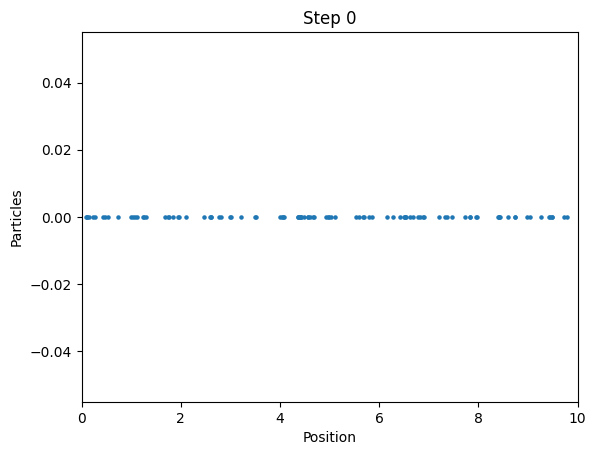

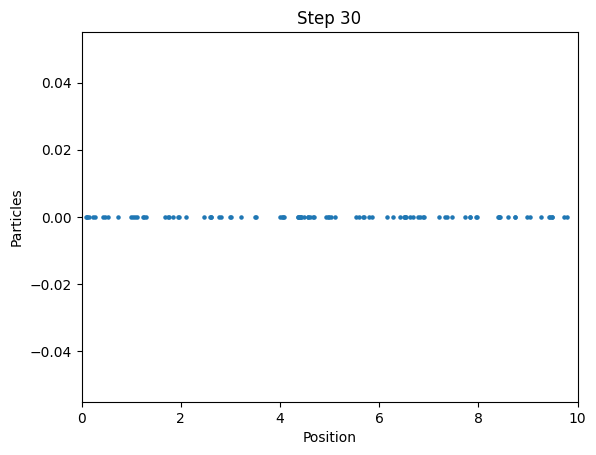

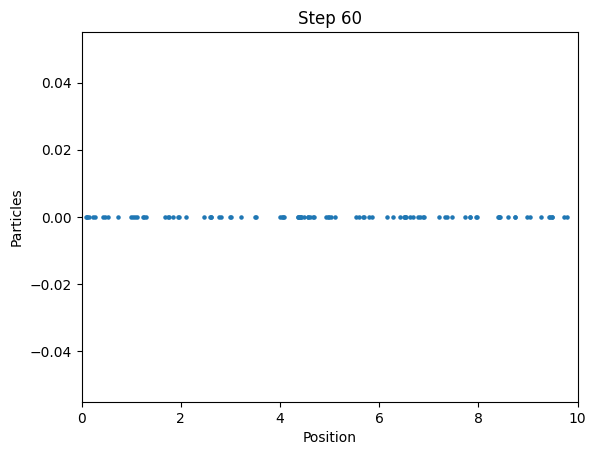

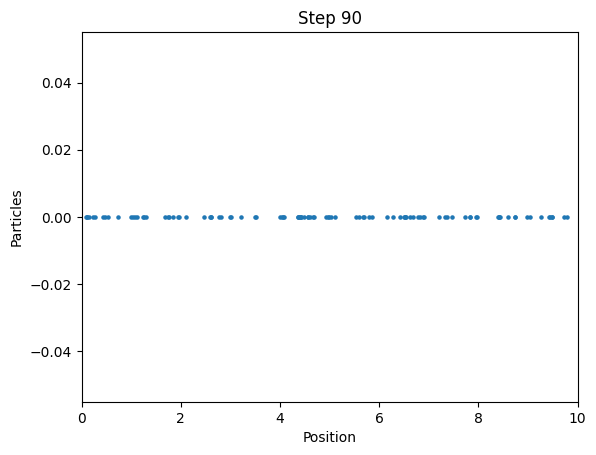

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_particles = 100
num_steps = 100
dt = 0.01  # Time step

# Initialize particles
positions = np.random.rand(num_particles) * 10  # Random initial positions
velocities = np.zeros(num_particles)
charges = np.ones(num_particles) * 1.6e-19  # Particle charge

# Static electric field (e.g., linear field)
E_field = np.linspace(0, 1e5, num_particles)

# PIC loop
for step in range(num_steps):
    # Update velocities
    for i in range(num_particles):
        velocities[i] += charges[i] * E_field[i] * dt

    # Update positions
    positions += velocities * dt

    # Plot positions every 10 steps
    if step % 30 == 0:
        plt.clf()
        plt.scatter(positions, np.zeros(num_particles), s=5)
        plt.xlim(0, 10)
        plt.xlabel("Position")
        plt.ylabel("Particles")
        plt.title(f"Step {step}")
        plt.pause(0.1)

plt.show()

## The libraries of Electrodynamics

Yes, several libraries provide efficient implementations for these numerical methods. Here’s a list of libraries tailored for different methods in computational electrodynamics and related fields:

### 1. **FDTD Method Libraries**
   - **[MEEP (MIT Electromagnetic Equation Propagation)](https://meep.readthedocs.io/)**:
     - **Description**: MEEP is a popular open-source FDTD software package specifically for electromagnetic simulations.
     - **Features**: Provides a range of geometries, materials, and source types, and it supports nonlinear, anisotropic, and dispersive media.
     - **Languages**: Python and C++.
     - **Example**:
       ```python
       import meep as mp

       cell = mp.Vector3(16, 8, 0)
       pml_layers = [mp.PML(1.0)]
       geometry = [mp.Block(mp.Vector3(1, 1, 1), center=mp.Vector3(), material=mp.Medium(epsilon=12))]
       sources = [mp.Source(mp.ContinuousSource(frequency=0.15), component=mp.Ez, center=mp.Vector3(-7, 0))]
       sim = mp.Simulation(cell_size=cell, boundary_layers=pml_layers, geometry=geometry, sources=sources, resolution=10)
       sim.run(until=200)
       ```

   - **[Lumerical FDTD Solutions](https://www.lumerical.com/)**:
     - **Description**: A commercial tool for 3D FDTD simulations in photonics and optics.
     - **Features**: Advanced tools for meshing, dispersive materials, and optimization for high-performance computing.
     - **Languages**: GUI-based with a script interface.

### 2. **Finite Element Method (FEM) Libraries**
   - **[FEniCS Project](https://fenicsproject.org/)**:
     - **Description**: FEniCS is a popular library for solving partial differential equations (PDEs) using FEM.
     - **Features**: It has a high-level Python interface, support for custom boundary conditions, and compatibility with complex geometries.
     - **Languages**: Python and C++.
     - **Example**:
       ```python
       from fenics import *
       mesh = UnitSquareMesh(32, 32)
       V = FunctionSpace(mesh, 'P', 1)
       u = TrialFunction(V)
       v = TestFunction(V)
       f = Constant(-6.0)
       a = dot(grad(u), grad(v)) * dx
       L = f * v * dx
       u = Function(V)
       solve(a == L, u)
       plot(u)
       ```

   - **[COMSOL Multiphysics](https://www.comsol.com/)**:
     - **Description**: A commercial software widely used for multiphysics simulations, including electrodynamics.
     - **Features**: Advanced GUI, physics-based modules, mesh generation, and solver tools.
     - **Languages**: GUI with a scripting interface for automation.

### 3. **Finite Difference Frequency Domain (FDFD) Libraries**
   - **[PyMKL](https://github.com/simpeg/pymkl)**:
     - **Description**: PyMKL provides an interface to Intel’s Math Kernel Library, which can be used for FDFD applications with efficient matrix solvers.
     - **Features**: Ideal for large matrix operations and matrix inversions required by FDFD.
     - **Languages**: Python.
   
   - **[scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html)**:
     - **Description**: SciPy's sparse linear algebra library provides efficient matrix operations for FDFD.
     - **Features**: Useful for custom FDFD implementations with sparse matrices.
     - **Example**:
       ```python
       from scipy.sparse import diags
       import numpy as np
       L = 100
       k = 1.5
       diagonals = [-np.ones(L-1), 2*np.ones(L), -np.ones(L-1)]
       A = diags(diagonals, [-1, 0, 1]).tocsc()
       b = np.zeros(L)
       b[0] = 1
       ```

### 4. **Method of Moments (MoM) Libraries**
   - **[scikit-rf](https://scikit-rf.readthedocs.io/)**:
     - **Description**: A Python library for RF engineering that supports network analysis and microwave design. While it doesn’t perform full MoM, it can be used in conjunction with MoM solvers.
     - **Features**: S-parameter computations, circuit analysis, and compatibility with RF components.
     - **Languages**: Python.

   - **[FEKO](https://altairhyperworks.com/product/FEKO)**:
     - **Description**: A commercial software for electromagnetic field simulations, primarily used for antenna design and scattering analysis.
     - **Features**: Hybrid MoM with other techniques (FEM, FDTD), efficient for large systems.
     - **Languages**: GUI with Lua and Python scripting.

### 5. **Pseudospectral Time Domain (PSTD) Libraries**
   - **[PyTorch and TensorFlow](https://pytorch.org/)** and **[TensorFlow](https://www.tensorflow.org/)**:
     - **Description**: Although not designed specifically for PSTD, these libraries can implement spectral derivatives with Fourier transforms, suitable for deep learning and simulation applications.
     - **Features**: Fast Fourier transform (FFT) libraries, GPU support for large computations.
     - **Languages**: Python.

   - **[SpectralDNS](https://github.com/spectralDNS/spectralDNS)**:
     - **Description**: A specialized library for spectral methods in fluid dynamics, adaptable for PSTD applications in electrodynamics.
     - **Features**: Domain decomposition for distributed memory, handling large grids.
     - **Languages**: Python.

### 6. **Particle-in-Cell (PIC) Method Libraries**
   - **[Warp](https://warp.readthedocs.io/en/latest/)**:
     - **Description**: A Python-based PIC library developed by the U.S. Department of Energy for high-energy particle accelerator simulations.
     - **Features**: Multi-species support, electromagnetic solvers, and high-performance computing support.
     - **Languages**: Python and Fortran.
     - **Example**:
       ```python
       from warp import *
       top.runlen = 1e-8
       w3d.nx = 32; w3d.ny = 32; w3d.nz = 128
       beam = Species(type=Proton, name="beam")
       beam.addparticles(x=np.random.randn(100), y=np.random.randn(100), z=np.linspace(0,1,100))
       step(100)
       ```

   - **[PlasmaPy](https://www.plasmapy.org/)**:
     - **Description**: An open-source library for plasma physics, which includes tools for PIC and other plasma simulation methods.
     - **Features**: Plasma physics routines, PIC methods, and compatibility with plasma diagnostics.
     - **Languages**: Python.

These libraries cover the majority of simulation needs in electrodynamics and related areas. While many are open-source and provide a broad set of functionalities, commercial options are also available for highly specialized applications.

These examples illustrate the numerical methods' core principles, tailored for classical electrodynamics problems. For more accurate or complex scenarios, especially in 3D or with high-resolution meshes, specialized libraries like **FEniCS** (for FEM) or **MEEP** (for FDTD) are often used.